## HOJA DE TRABAJO
REGRESIÓN LINEAL REGULARIZADA

CARLOS HUMBERTO CHEW ROLDÁN - 17507

El objetivo del laboratorio es predecir la admisión del alumno, analizando los datos del data set. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

In [2]:
data = np.genfromtxt('Admission_Predict.csv', delimiter=',')
data = np.delete(data, 0, 0)

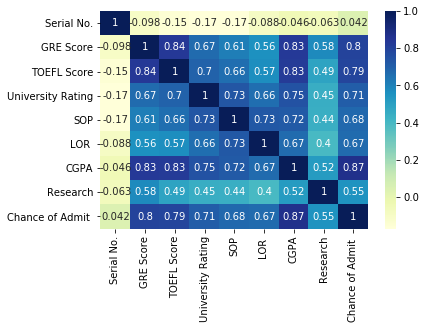

In [3]:
sb.heatmap(pd.read_csv('Admission_Predict.csv').corr(), cmap="YlGnBu" , annot=True)

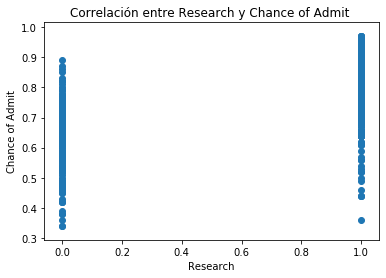

In [4]:
plt.scatter(data[:,7], data[:,8])
plt.title("Correlación entre Research y Chance of Admit ")
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
plt.show()

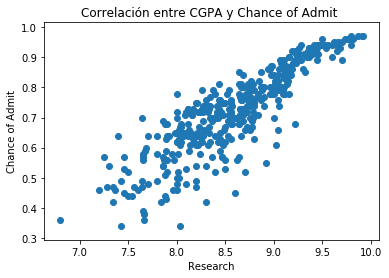

In [5]:
plt.scatter(data[:,6], data[:,8])
plt.title("Correlación entre CGPA y Chance of Admit ")
plt.xlabel("Research")
plt.ylabel("Chance of Admit")
plt.show()

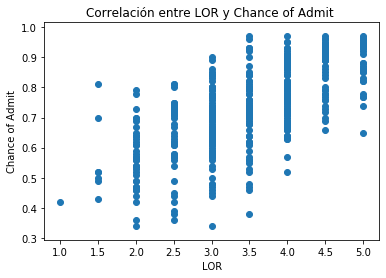

In [6]:
plt.scatter(data[:,5], data[:,8])
plt.title("Correlación entre LOR y Chance of Admit ")
plt.xlabel("LOR")
plt.ylabel("Chance of Admit")
plt.show()

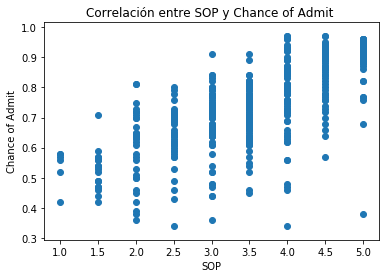

In [7]:
plt.scatter(data[:,4], data[:,8])
plt.title("Correlación entre SOP y Chance of Admit ")
plt.xlabel("SOP")
plt.ylabel("Chance of Admit")
plt.show()

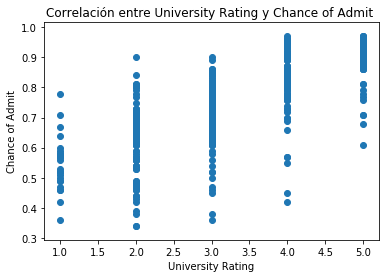

In [8]:
plt.scatter(data[:,3], data[:,8])
plt.title("Correlación entre University Rating y Chance of Admit ")
plt.xlabel("University Rating")
plt.ylabel("Chance of Admit")
plt.show()

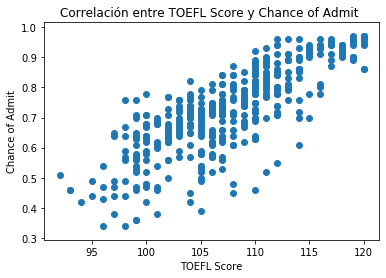

In [9]:
plt.scatter(data[:,2], data[:,8])
plt.title("Correlación entre TOEFL Score y Chance of Admit ")
plt.xlabel("TOEFL Score")
plt.ylabel("Chance of Admit")
plt.show()

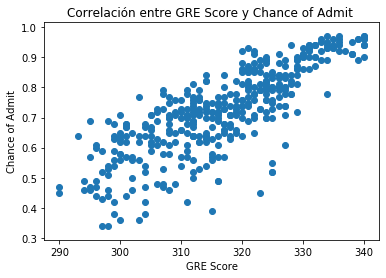

In [10]:
plt.scatter(data[:,1], data[:,8])
plt.title("Correlación entre GRE Score y Chance of Admit ")
plt.xlabel("GRE Score")
plt.ylabel("Chance of Admit")
plt.show()

Proporcionar información adicional sobre la técnica de descenso de gradiente

In [11]:
def linear_cost_derivate(X, y, theta, lam_x):
    h = np.matmul(X, theta)
    m, _ = X.shape
    regularization  = (lam_x / m) * theta.sum()
    result = ((np.matmul((h - y).T, X).T) + regularization) / m
    return result

Esta es la función donde la curva de costos de un producto en particular será una línea recta.

In [12]:
def linear_cost(X, y, theta, lam_x):
    m, _ = X.shape
    h = np.matmul(X, theta)
    sq = (y - h) ** 2
    regularization = theta ** 2
    addition =sq.sum() + np.sum(lam_x * regularization)
    return (addition)/ (2 * m) 

El gradient_descent es un algoritmo de optimización utilizado para minimizar algunas funciones moviéndose iterativamente en la dirección del descenso más pronunciado según lo definido por el negativo del gradiente.

In [13]:
def gradient_descent(
        X,
        y,
        theta_0,
        cost,
        cost_derivate,
        alpha=0.01,
        treshold=0.0001,
        max_iter=10000,
        lam_x=0.5):
    theta, i = theta_0, 0
    costs = []
    gradient_norms = []
    while np.linalg.norm(cost_derivate(X, y, theta,lam_x)) > treshold and i < max_iter:
        theta -= alpha * cost_derivate(X, y, theta,lam_x)
        i += 1
        costs.append(cost(X, y, theta,lam_x))
        gradient_norms.append(cost_derivate(X, y, theta,lam_x))
    return theta, costs, gradient_norms

Se calcula el valor de Θ 

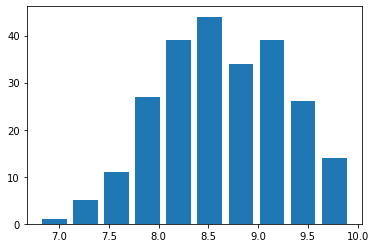

In [14]:

CGPA = data[0:240,6]
y = data[0:240,8]
X = np.vstack(
    (
        np.ones(240),
        CGPA,
    )
).T
data_values = (X, y.reshape(240,1))
n, bins, patches = plt.hist(x = CGPA,
                            rwidth=0.8)


In [15]:
(X, y) = data_values
m, n = X.shape
theta_0 = np.random.rand(n,1)
theta, cost, gradient_norms = gradient_descent(
    X,
    y,
    theta_0,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=100000,
    lam_x = 0.5
)

print('Valor de Θ :', theta)

Valor de Θ : [[0.00852652]
 [0.08400994]]


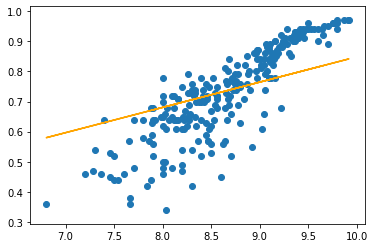

In [16]:
plt.scatter(X[:,1], y)
plt.plot(X[:, 1], np.matmul(X, theta), color="orange")
plt.show()

Valor de theta: [[0.00824542]
 [0.0840297 ]]


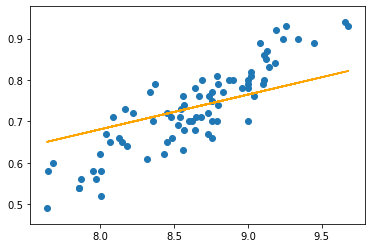

In [17]:
crossValidation = np.vstack(
    (
        np.ones(80),
        data[240:320, 6],
    )
).T

crossValidationY = data[240:320, 8]
dataset_CV = (crossValidation, crossValidationY.reshape(80,1))
(cvX, cvY) = dataset_CV
m, n = cvX.shape

thetaCV, cost, gradient_norms = gradient_descent(
    cvX,
    cvY,
    theta,
    linear_cost,
    linear_cost_derivate,
    alpha=0.00001,
    treshold=0.00001,
    max_iter=10000,
    lam_x=0.1
)

print('Valor de theta:', thetaCV)

plt.scatter(cvX[:,1], cvY)
plt.plot(cvX[:, 1], np.matmul(cvX, thetaCV), color='orange')
plt.show()

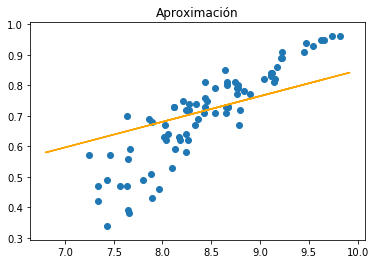

In [18]:
plt.scatter(data[321:400,6], data[321:400,8])
plt.title('Aproximación')
plt.plot(X[:, 1], np.matmul(X, theta), color='orange')
plt.show()

Se creo una buena aproximación.